In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#def find edit distance between two strings
def edit_distance(s1, s2):
    s1 = ' ' + s1
    s2 = ' ' + s2
    
    #initialize matrix
    D = np.zeros((len(s1), len(s2)))

    #initialize first row and column
    for i in range(len(s1)):
        D[i][0] = i
    for j in range(len(s2)):
        D[0][j] = j
        
    #fill in matrix
    for i in range(1, len(s1)):
        for j in range(1, len(s2)):
            if s1[i] == s2[j]:
                D[i][j] = D[i-1][j-1]
            else:
                D[i][j] = min(D[i-1][j] + 1, D[i][j-1] + 1, D[i-1][j-1] + 1)
                
    return D[len(s1)-1][len(s2)-1]

In [6]:
def softacc(s1, s2):
    return 1 - edit_distance(s1, s2)/max(len(s1), len(s2))


In [7]:
print(edit_distance('1234', '13')) #0
print(softacc('1234', '13')) #0.5

2.0
0.5


In [18]:
#in int_addition.txt we have the following data in the following format:
#[2, 1, 3] = 2 + 1 = 3 where the first two numbers are the numbers to be added and the third number is the result

#each data point is separated by a newline character

#read the data from the file
accuracy = 0
total = 0

digit_accuracy = {str(i):0 for i in (1,2,3,4,5,6)}
digit_total = {str(i):0 for i in (1,2,3,4,5,6)}

both_positive = {str(i):0 for i in (1,2,3,4,5,6)}
both_negative = {str(i):0 for i in (1,2,3,4,5,6)}
one_positive_one_negative = {str(i):0 for i in (1,2,3,4,5,6)}

both_positive_total ={str(i):0 for i in (1,2,3,4,5,6)}
both_negative_total = {str(i):0 for i in (1,2,3,4,5,6)}
one_positive_one_negative_total = {str(i):0 for i in (1,2,3,4,5,6)}


#soft accuracy
soft_accuracy = 0

both_positive_soft = {str(i):0 for i in (1,2,3,4,5,6)}
both_negative_soft = {str(i):0 for i in (1,2,3,4,5,6)}
one_positive_one_negative_soft = {str(i):0 for i in (1,2,3,4,5,6)}


with open('int_addition_modified.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        
        #strip the newline character
        line = line.strip()
        
        
        #check 2 equal sign in the line
        if line.count('=') != 2:
            continue
        
        
        
        #split the line by the equal sign
        line_parts = line.split('=')
        
        #line_parts=['[2, 1, 3] ', ' 2 + 1 ', ' 3']
        
        #get the first and last part
        first_part = line_parts[0].strip()
        last_part = line_parts[2].strip()
        #remove commas from last part
        last_part = last_part.replace(',','')
        
        #check last part is a number
       
        try:
            int(last_part)
            #print('Yes')
        except ValueError:
            print('Invalid prediction')
            print('Last part:',last_part)
            continue
        
        
        #first_part=[2, 1, 3]
        #last_part=3
        
        #remove the brackets from the first part
        first_part = first_part[1:-1]
        
        #first_part=2, 1, 3
        
        #split the first part by comma
        
        first_part = first_part.split(',')
        
        actul_result = int(first_part[2].strip())
        
        true_result = int(last_part)
        
        #check the accuracy of each digit
        #check no of digits in first number
        first_number = int(first_part[0].strip())
        #find no of digits
        first_number_digits = len(str(abs(first_number)))
        
        
        #check no of digits in second number
            
        second_number = int(first_part[1].strip())
        #find no of digits
        second_number_digits = len(str(abs(second_number)))
        
        if actul_result == true_result:
            accuracy += 1
            
            
            # print('First number:',first_number)
            # print('Second number:',second_number)
            
            
            #update in dictionary
            if first_number_digits <= 6:
                digit_accuracy[str(first_number_digits)] += 1
                
                #check if both numbers are positive
                if first_number > 0 and second_number > 0:
                    both_positive[str(first_number_digits)] += 1
                    
                #check if both numbers are negative
                elif first_number < 0 and second_number < 0:
                   
                    both_negative[str(first_number_digits)] += 1
                    
                #else one positive and one negative
                else:
                    one_positive_one_negative[str(first_number_digits)] += 1
                    
        

        
            
        #update total
        if first_number_digits <= 6:
                    #check soft accuracy
            soft_accuracy += softacc(str(actul_result), str(true_result))
            # print('actual:',actul_result,str(actul_result))
            # print('true:',true_result,str(true_result))

            
            
            
            
            digit_total[str(first_number_digits)] += 1
            total += 1
            
            #check if both numbers are positive
            if first_number > 0 and second_number > 0:
                both_positive_total[str(first_number_digits)] += 1
                both_positive_soft[str(first_number_digits)] += softacc(str(actul_result), str(true_result))
                
            #check if both numbers are negative
            elif first_number < 0 and second_number < 0:
                both_negative_total[str(first_number_digits)] += 1
                both_negative_soft[str(first_number_digits)] += softacc(str(actul_result), str(true_result))
                
            #else one positive and one negative
            else:
                one_positive_one_negative_total[str(first_number_digits)] += 1
                one_positive_one_negative_soft[str(first_number_digits)] += softacc(str(actul_result), str(true_result))
                
                
print('Accuracy:',accuracy/total)

Invalid prediction
Last part: ?
Invalid prediction
Last part: ?
Invalid prediction
Last part: ?
Invalid prediction
Last part: ?
Invalid prediction
Last part: ?
Invalid prediction
Last part: ?
Accuracy: 0.44570230607966455


In [19]:
#print the accuracy dictionary
print('Accuracy dictionary:',digit_accuracy)
print('Total dictionary:',digit_total)

Accuracy dictionary: {'1': 282, '2': 247, '3': 196, '4': 172, '5': 101, '6': 61}
Total dictionary: {'1': 395, '2': 399, '3': 392, '4': 400, '5': 399, '6': 400}


In [20]:
both_positive_total

{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100, '6': 100}

In [21]:
both_negative_total

{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100, '6': 100}

In [22]:
one_positive_one_negative_total

{'1': 195, '2': 199, '3': 192, '4': 200, '5': 199, '6': 200}

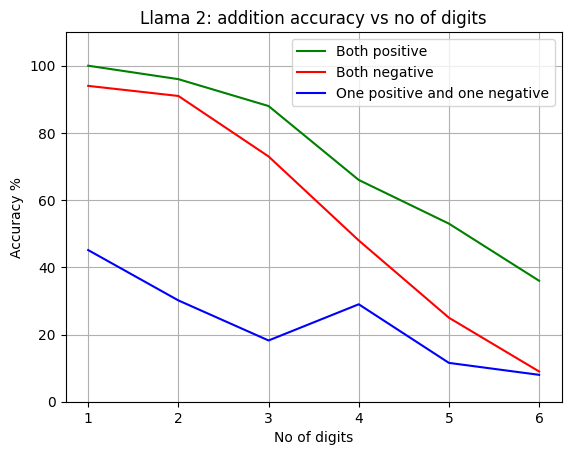

In [32]:
#plot the accuracy for both positive, both negative and one positive one negative and vs digits
#plot the accuracy for each digit
x = np.arange(1,7)
y_positive = [both_positive[str(i)]/both_positive_total[str(i)] *100  for i in range(1,7)]
y_negative = [both_negative[str(i)]/both_negative_total[str(i)] *100 for i in range(1,7)]
y_one_positive_one_negative = [one_positive_one_negative[str(i)]/one_positive_one_negative_total[str(i)] *100 for i in range(1,7)]

plt.plot(x,y_positive,label='Both positive',color='green')
plt.plot(x,y_negative,label='Both negative',color='red')
plt.plot(x,y_one_positive_one_negative,label='One positive and one negative',color='blue')
plt.xlabel('No of digits')
plt.ylabel('Accuracy %')
plt.ylim(0,110)
plt.title('Llama 2: addition accuracy vs no of digits')
plt.legend()
plt.grid()
plt.show()


In [33]:
y_negative

[94.0, 91.0, 73.0, 48.0, 25.0, 9.0]

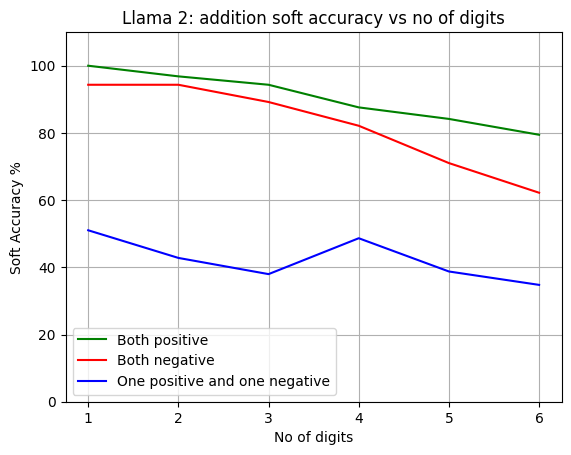

In [35]:
#plo soft accuracy
x = np.arange(1,7)
y_positive = [both_positive_soft[str(i)]/both_positive_total[str(i)]*100  for i in range(1,7)]
y_negative = [both_negative_soft[str(i)]/both_negative_total[str(i)]*100  for i in range(1,7)]
y_one_positive_one_negative = [one_positive_one_negative_soft[str(i)]/one_positive_one_negative_total[str(i)]*100  for i in range(1,7)]

plt.plot(x,y_positive,label='Both positive',color='green')
plt.plot(x,y_negative,label='Both negative',color='red')
plt.plot(x,y_one_positive_one_negative,label='One positive and one negative',color='blue')
plt.xlabel('No of digits')
plt.ylabel('Soft Accuracy %')
plt.title('Llama 2: addition soft accuracy vs no of digits')
plt.ylim(0,110)
plt.legend()
plt.grid()
plt.show()


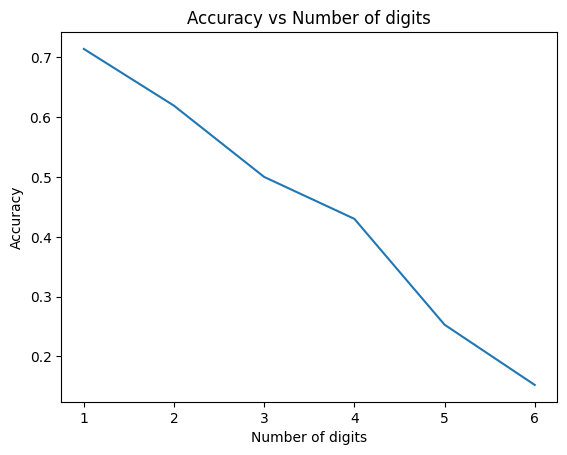

Overall accuracy: 0.44570230607966455


In [10]:
#plot digit accuracy vs total
x = [int(i) for i in digit_accuracy.keys()]
y = [digit_accuracy[str(i)]/digit_total[str(i)] for i in x]

plt.plot(x,y)
plt.xlabel('Number of digits')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of digits')
plt.show()

#calculate the overall accuracy
overall_accuracy = accuracy/total
print('Overall accuracy:',overall_accuracy)
